In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

C:\Users\anane\anaconda3\envs\py3.7_qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [27]:
def state(gate):
    qc = QuantumCircuit(1)
    if gate=="x":
        qc.x(0)
    elif gate=="h":
        qc.h(0)
    elif gate=="z":
        qc.z(0)
    elif gate=="hzh":
        qc.h(0)
        qc.z(0)
        qc.h(0)
    visualize_transition(qc, fpg=20, spg=1, trace=True)
    
def bell_state():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.x(1)
    qc.cx(0,1)
    return qc

# Introduction to Quantum Computation
*by [Ana Neri](https://anac.nery.name/)*

## Content

* [What is a quantum computer?](#quantumcomputer) 
* [A (qu)bit of theory](#theory)
* [Creating and Running your first Quantum Circuit](#quantumcircuit)
* [Final remarks](#final)

<a id='quantumcomputer'></a>

## What is a quantum computer?

Richard Feynman came up with a solution that solve the issues:

"*Nature isn't classical, dammit, and if you want to make a simulation of nature, you'd better make it quantum mechanical, and by golly it's a wonderful problem, because it doesn't look so easy.*" - Feynman.

There is a growing pile of **problems too complex** for classical computers. 

The classical computers are improving fast. 

However, their development is reaching the physical limit.

The components (namely, transistors) that make our classical computers are getting smaller. 

So small that they now have to handle problems like the **quantum tunnelling effects**. 

The existence of quantum tunnelling in the component means that it is no longer **deterministic**.

The computer is no longer working with $0$'s and $1$'s but rather the **probability** of $0$'s and $1$'s. 

<a id='theory'></a>

## A (qu)bit of theory

### Superposition

Superposition is the concept associated with the famous thought experiment: **Schrödinger's cat**. 

<img src="img/cat02.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="center">

In this mental experiment, a cat is on a box with a radioactive material, that may or not release some particles. If the material releases particles, a device will register their presence and unleash a deadly poison. 
After one hour, the cat has 50 per cent chances of being dead. 
Since we can not be sure about the cat state until we open the box, so instead of clamming the cat is dead OR alive, we say it is in a mixed probability of dead AND alive. In other words, until its observation, it is in all possible states.

### The qubit

A single qubit quantum state is usually represented with the *ket* notation:

$$|\psi\rangle = \alpha |0 \rangle + \beta | 1 \rangle $$

Or with a vector:
$$ |\psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rightarrow |0\rangle = \begin{bmatrix}1 \\ 0 \end{bmatrix}; |1 \rangle = \begin{bmatrix} 0 \\ 1\end{bmatrix}$$


Since it is normalized $|\alpha|^2 + |\beta|^2$ its is also posible to use the following representation:
$$|\psi \rangle = \cos{\bigg( \frac{\theta}{2}} \bigg) |0 \rangle + \sin{ \bigg( \frac{\theta}{2}}\bigg) e^{i \phi}|1\rangle $$

**Bloch Spere**

<img src="img/Bloch_sphere.svg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="center">

### Quantum single qubit gates

Although the basic gate set of IBM Q devices is
$$\{id,u1,u2,u3,cx\}$$

Where
$$U_3(\theta,\phi,\lambda)= \begin{bmatrix}\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\lambda}sin(θ/2) & e^{i\lambda+i\phi}cos(θ/2)\end{bmatrix} $$.

QISKit supports many gates. (Check the [Summary of quantum operations](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb) in the tutorials of Terra)

**Gate X**

The X-gate is also known as NOT gate or “bit-flip”, since it changes a state $| 0 \rangle $ to $| 1 \rangle $ and vice versa. This is the quantum analogue to a classical NOT gate.

On the Bloch sphere representation, this operation corresponds to a rotation of the state around the X-axis by $\pi$ radians.

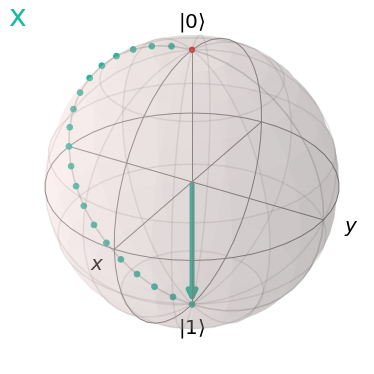

In [3]:
state("x")

**Gate H**

The Hadamard gate may be used to create superposition. It maps the basis state $| 0 \rangle$ to $| + \rangle =\frac{| 0 \rangle + | 1 \rangle }{\sqrt{2}}$, and $| 1 \rangle $ to $ | - \rangle =\frac{ |0 \rangle - |1 \rangle }{\sqrt{2}}$. On the Bloch sphere, $| + \rangle$ and $| - \rangle $ are represented by points on the X axis.

When measured, these states have equal probability of becoming $| 1\rangle $ or $| 0 \rangle $, since the square modulus of the probability amplitude for each of the basis states has equal value.

In fact, $|+\rangle $ and $| - \rangle $ are indistinguishable when measured on the computational basis. However, the states can be identified by measuring the qubit on the superposition basis, i.e. along the X-axis. A way to achieve this is by simply applying an Hadamard gate before performing the measurement.

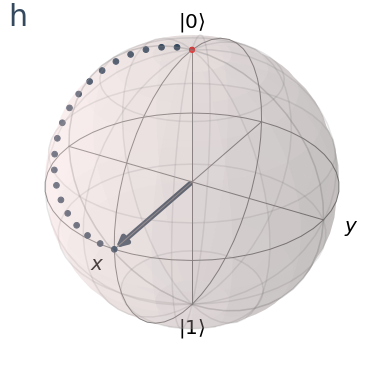

In [4]:
state("h")

**Gate Z**

The phase-flip gate is defined as:

$$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

It leaves the basis state $|0\rangle$ unchanged, while mapping $|1\rangle$ to $−|1\rangle$. In the Bloch sphere representation, and similarly to the X gate, it rotates the state around the Z axis by $\pi$ radians.

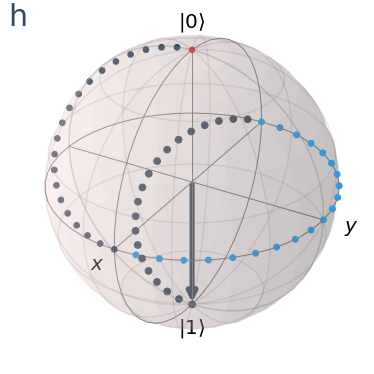

In [5]:
state("hzh")

### Entanglement

Let's continue with the cats. Now the experiment starts with two cats each cat goes to a deadly box. One box goes to the moon, and the other stays on earth.

If they are entanglement, they share a connection.

Eventually, someone opens the box that is on earth and sees the cat alive and **immediately** knows that the cat on the moon is dead. 

### Quantum multiqubit gates

The CNOT gate, also known as controlled-X, is the fundamental two-qubit gate. Together with a generalized single-qubit unitary gate, we are able to decompose any multi-qubit operation. The CNOT gate takes one qubit as control, and one qubit as target.

* if the control qubit is in the state $|0\rangle$, the target qubit is left alone;
* if the control qubit is in the state $|1\rangle$, the X gate is applied to the target qubit.

This gate allows us to unlock a powerful property of quantum particles: entanglement. Without it, quantum computers would lose most of their potential advantage over the classical computing paradigm.

In quantum circuits, CNOT gates are used to entangle pairs of qubits.

|before| $q_0$ | $q_1$ |after| $q_0$ | $q_1$ |
|-|-|-|-|-|-|
| |$0$|$0$| |$0$|$0$|
| |$0$|$1$| |$0$|$1$|
| |$1$|$0$| |$1$|$1$|
| |$1$|$1$| |$1$|$0$|

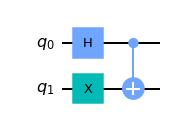

<a id='quantumcircuit'></a>

## Creating and Running your first Quantum Circuit

### IBM Quantum Experience

IBM Quantum Experience is an online platform that allows anyone it may concern the access to Quantum processors via clould. 
How to start:

1. Follow the link: [https://quantum-computing.ibm.com/](https://quantum-computing.ibm.com/)
2. Create an account.


In this webpage you can find a lot of information about the backends availables and your circuits. 

Moreover, you have access to:

* Circuit Composer
* Quantum Lab

### Circuit Composer


<img src="img/circuit_comp.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="1000 px" align="center">

### Quantum Lab

Qiskit is IBM's quantum computing SDK.

[https://qiskit.org/](https://qiskit.org/)

You can simulate quantum computers behaviour or run in quantum hardware.



It is divided in four elements:

    1. Terra
    2. Aer
    3. Aqua
    4. Ignis

### Create a circuit

``` 
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.tools.jupyter import *
from qiskit.visualization import *
```


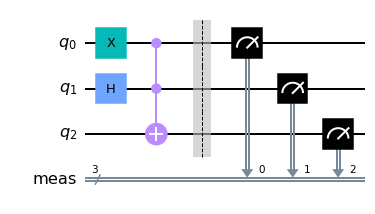

In [6]:
myqc = QuantumCircuit(3)

myqc.x(0)
myqc.h(1)
myqc.ccx(0,1,2)
myqc.measure_all()

myqc.draw(output='mpl')

### Simulate a circuit

```
from qiskit import execute, Aer
```

{'001': 484, '111': 516}


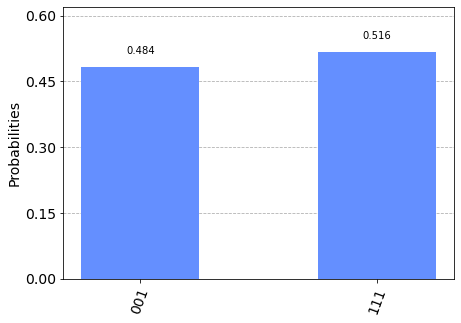

In [7]:
# Use Aer's qasm_simulator
q_simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit 1000 times on the qasm simulator
job_a = execute(myqc, q_simulator, shots=1000)

# Grab the results from the job
result_a = job_a.result()
counts_a = result_a.get_counts(myqc)

# Print frequencies, and plot histogram
print(counts_a)
plot_histogram(counts_a)

### Run in a quantum machine

```
from qiskit import IBMQ

# Loading your IBM Q account(s)
provider = IBMQ.load_account()
```

In [8]:
# Checking the available backends from the IBMQ provider

my_provider_ibmq = IBMQ.get_provider(hub='ibm-q', group='open', project='main') 

my_provider_ibmq.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
%qiskit_backend_overview

In [10]:
# Define backend
backend = my_provider_ibmq.get_backend('ibmq_16_melbourne')

# See backend information
backend

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
# Monitor queued jobs
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

```
# Define number of experiments
shots = 1024
job_r = execute(myqc, backend, shots=shots)

# Save job ID if you wish to retrieve results later
jobID_r = job_r.job_id()

print('JOB ID: {}'.format(jobID_r))
```

In [12]:
# Now you can retrieve job using the ID
job_get=backend.retrieve_job('5fd55ed798fcf6001aecbd10')

# Get measurement information
counts_run = job_get.result().get_counts()

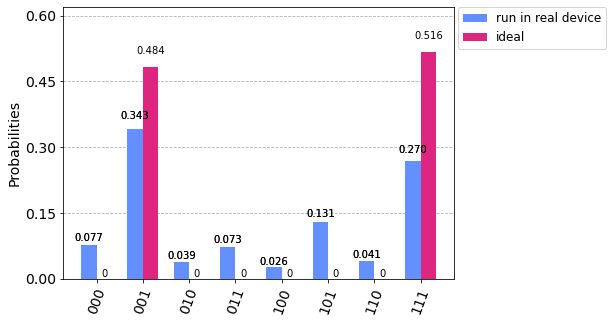

In [13]:
plot_histogram([counts_run, counts_a ], legend=[ 'run in real device', 'ideal'])

### Looking closer

```
from qiskit.compiler import transpile
```

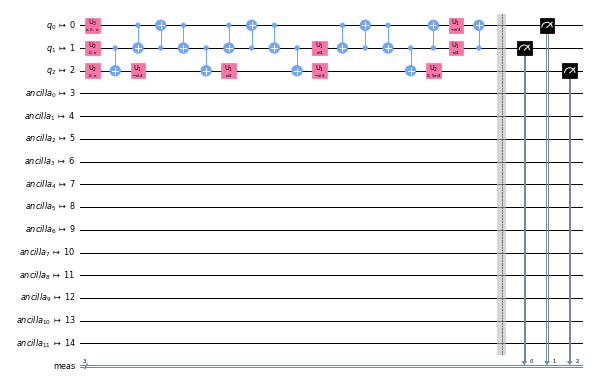

In [33]:
backend = my_provider_ibmq.get_backend('ibmq_16_melbourne')

qc_t_real = transpile(myqc, backend=backend)

qc_t_real.draw(scale=0.5, output='mpl')

In [15]:
myqc.depth()

3

In [16]:
qc_t_real.depth()

19

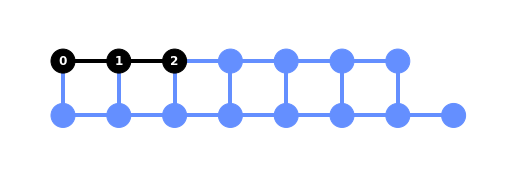

In [17]:
plot_circuit_layout(qc_t_real, backend)

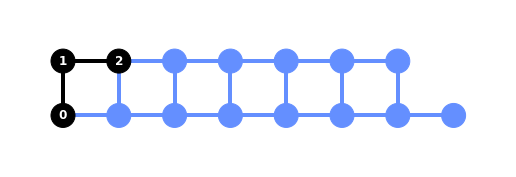

In [18]:
qc_t_opt = transpile(myqc, backend=backend, optimization_level=3)
plot_circuit_layout(qc_t_opt, backend)

<a id='final'></a>

## Final remarks

* Industries of high-tech, industrial goods, chemistry and pharma, finances, and energy are aware of the immense potential in quantum computers. 
* Right now, the field has a generous amount of investments, but we are in the initial stage of the quantum computing history. 
* There is still plenty of open problems to enter the next Era of quantum computing. 

#### Time to explore

* https://www.bcg.com/publications/2018/next-decade-quantum-computing-how-play
* https://www.youtube.com/watch?v=DxQK1WDYI_k
* https://qiskit.org/textbook/what-is-quantum.html
* https://www.amazon.com/Quantum-Computing-Computer-Scientists-Yanofsky/dp/0521879965
* https://www.amazon.com/Quantum-Computation-Information-10th-Anniversary/dp/1107002176/ref=pd_sbs_14_2/137-7592290-4464342?_encoding=UTF8&pd_rd_i=1107002176&pd_rd_r=f0e564e3-0186-4874-944a-f27cc062b305&pd_rd_w=ReFnj&pd_rd_wg=wpO1V&pf_rd_p=ed1e2146-ecfe-435e-b3b5-d79fa072fd58&pf_rd_r=6AH19BC5KVAHHGTT2GW9&psc=1&refRID=6AH19BC5KVAHHGTT2GW9

In [32]:
%qiskit_version_table